# TITANIC PREDICTION

In [1]:
#Data Analysis 
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import chi2_contingency

#Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns

# **1. Data Acquisition**

We start by acquiring the datasets individually and also combine them:

In [2]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
ds=[train,test]

# **2. Data Analysis**

- What are the columns available?

In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- View the data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- What are the size of dataset?

In [5]:
train.shape

(891, 12)

- What are the types of variables?

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- What columns have duplicated rows?

In [7]:
train[train.duplicated].count()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

It was not identified duplicated rows.

- What columns have null values?

In [8]:
train.isnull().values.any()

True

In [9]:
#How many columns? 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Analyse of numerical features

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Insights of numerical feature:**
- PassengerId is a unique value that is from 1 to 891. it may be dropped from training dataset as it does not contribute to survival.
- Survived has 2 values, 1 or 0, it's a target feature
- Although Pclass is classified as a numerical variable, she is categorical because has only three categories (1,2,3).
- Few elderly passengers, the most of them are younger because the distribuition of 75% has passengers with 38 years.
- The most of passengers are alone since 75% of  SibSp and Parch are 1 and 0.

- Analyse of categorical features

In [11]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Insights of categorical feature:**
- Name is a unique value, is relatively non-standard, may not contribute directly to survival, so maybe dropped.
- Sex variable has two possibility : male and female with predominant male.
- Embarked take three values with S the top.
- Ticket and Cabine has duplicates values

**Target variable**

In [12]:
fa = round(train['Survived'].value_counts(normalize=True)*100)
fa

0    62.0
1    38.0
Name: Survived, dtype: float64

-The percent of people don´t survived is higher, it seems to be unbalanced.

**Pclass**

Univariate analysis of a categorical - Frequency table

In [13]:
#table
fa = train['Pclass'].value_counts().sort_index()
fr = round(fa/len(train['Pclass'])*100)
tab = pd.DataFrame({
    'Class': fa.index,
    'Absolute Frequency': fa.values,
    'Relative Frequency': fr.values
})
print(tab)

   Class  Absolute Frequency  Relative Frequency
0      1                 216                24.0
1      2                 184                21.0
2      3                 491                55.0


-evaluation: there are more people from class 3 in the ship.

Bivariate - pclass x survived (target)

In [14]:
tab1 = pd.crosstab(train['Pclass'],train['Survived'])
print(tab1)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


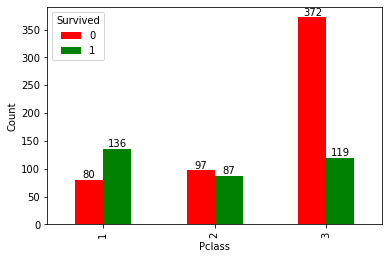

In [15]:
ax = tab1.plot(kind='bar',color=['red', 'green'])
plt.xlabel('Pclass')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

evaluation:
- according to the graph pclass=3 had most passegers, however most did not survived.
- the upper-class passengers (pclass=1) were more likely to have survived.

In [16]:
# Chi-square test
estat, p,lib,_= chi2_contingency(tab1)
# Imprimindo os resultados
print(f"Estatistic: {estat}")
print(f"P: {p}")
print(f"Degrees of freedom: {lib}")

Estatistic: 102.88898875696056
P: 4.549251711298793e-23
Degrees of freedom: 2


evaluation:
- according to the graph, it was possible to observe a very marked disparity in the proportions, which may be an indication of association.
- To evaluate better this association was applied the test of chi-square.
- As the value of was lower than 0.05, extremely low, it can be concluded that there is a significant association between the categorical variables represented.
- Therefore, this feature will be kept.

**Age**

Univariate analysis

In [17]:
#Quantity of null values
train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

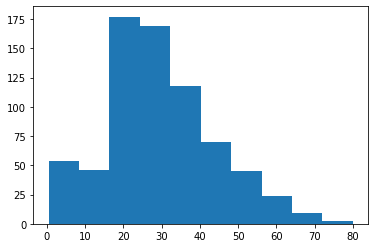

In [18]:
#Histogram
plt.hist(train['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2733ef80280>,
 'caps': [<matplotlib.lines.Line2D at 0x2733ef808e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2733ef6edf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2733ef8c040>],
 'fliers': [<matplotlib.lines.Line2D at 0x2733ef8c3d0>],
 'means': []}

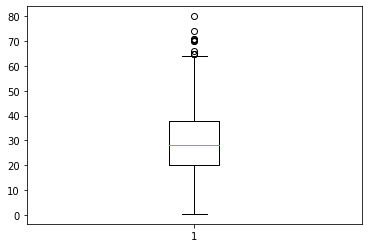

In [19]:
#Boxplot
b1 = [i for i in train['Age'] if not np.isnan(i)]
plt.boxplot(b1)

In [20]:
#Quantity of values > 65
b2 = [i for i in train['Age'] if not np.isnan(i) and i >= 65 ]
len(b2)

11

In [21]:
#Median of age
median_ = train['Age'].median()
median_

28.0

In [22]:
#Mean 
mean_ = train['Age'].mean()
mean_

29.69911764705882

- Null values - The analyse unidimensional of age show that we have a huge number of null values, it's a question that must be solved. As we have a large number of null, the best approach is to replace this values. 
- Histogram -  Look at  distribution on histogram it is noticed  that the most of  passengers are younger. Children represent a small proportion.The distribution might follow a normal curve. 
- Boxplot - It seems we have outliers in the age variable, the number of people with age >65 is only 11. 

ANALYSIS: If will be keep this variable in the study,it is important to replace the null values. One approach to use is change the null values for either median or mean. However, as we have possible outiliers mean can be influenced, so one solution could be change null values for the median.

Bivariate 

In [25]:
surv = train[train['Survived'] == 1]['Age'].dropna().tolist()
nosurv = train[train['Survived'] == 0]['Age'].dropna().tolist()

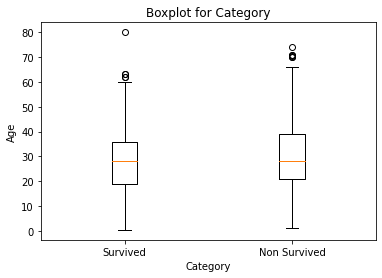

In [26]:
plt.boxplot([surv, nosurv], labels=['Survived', 'Non Survived'])
plt.xlabel('Category')
plt.ylabel('Age')
plt.title('Boxplot for Category')
plt.show()

C:\Users\amand\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\amand\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


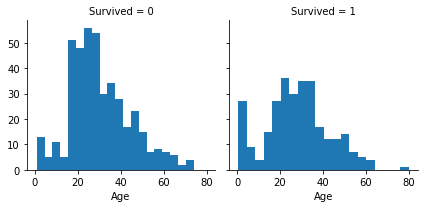

In [27]:
#histogram
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

-According with bthe graphs:
-oldest passagers survived(age=80);
-the quantity of non-survived is high than suvived;
-Children have a high rate of survived;
-Its possible observe a correlation between this variable and the rate of suvived since we have a displacement trend for the survivor rate

**SibSp, Parch**

In [28]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [29]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [30]:
tab2 = pd.crosstab(train['SibSp'],train['Survived'])
print(tab2)

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


In [31]:
tab3 = pd.crosstab(train['Parch'],train['Survived'])
print(tab3)

Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0


Evaluation - These features have a zero correlation for certains values. The result represent the most of  people there,
don't have family associated. So, both variables may be combined.

**Fare**

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

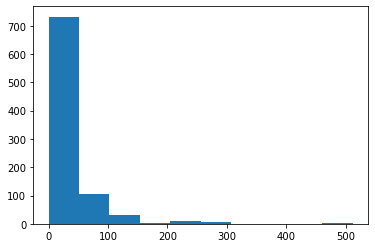

In [32]:
#Histogram
plt.hist(train['Fare'])

evaluation:
- the most of people payed <100 dol;
- few people payed 500 dol;

C:\Users\amand\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\amand\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


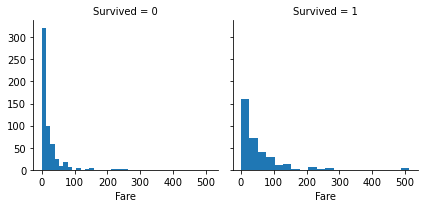

In [34]:
#histogram for target group
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

evaluation:
- people who payed more survived more
- There is a correlation between two variables

**Embarked**

train['Embarked'].value_counts()

In [ ]:
#the most of th embarked in S = Southampton

In [36]:
tab4 = pd.crosstab(train['Embarked'],train['Survived'])
print(tab4)

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


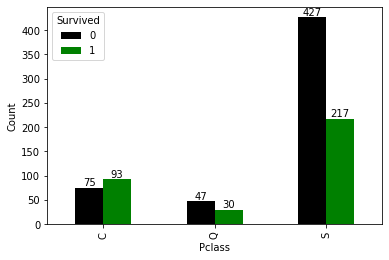

In [37]:
ax = tab4.plot(kind='bar',color=['black', 'green'])
plt.xlabel('Pclass')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [38]:
#the most of survived people came from S = Southampton,this fact show that there is one prossible correlation between variables. 

**Sex**

In [42]:

tab5 = pd.crosstab(train['Sex'],train['Survived'])
print(tab5)

Survived    0    1
Sex               
female     81  233
male      468  109


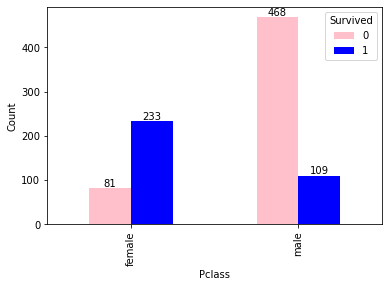

In [44]:
ax = tab5.plot(kind='bar',color=['pink', 'blue'])
plt.xlabel('Pclass')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [45]:
#the most survived people are female and the most non-survived are male

**Cabin**

In [55]:
train['Cabin'].describe(include=['O'])

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [56]:
#As the number of count is higher than the unique, people could be dividing the cabins 
#As the number of na is high, this variable may be dropped

In [ ]:
**Ticket**

In [58]:
train['Ticket'].describe(include=['O'])

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [ ]:
#As the number of count is higher than the unique, people could be dividing tickets;
#It seems that it doesn't have correlation with target variable

**Correlation among variables**

C:\Users\amand\AppData\Local\Temp/ipykernel_2556/398757099.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap='Blues',annot=True)


<AxesSubplot:>

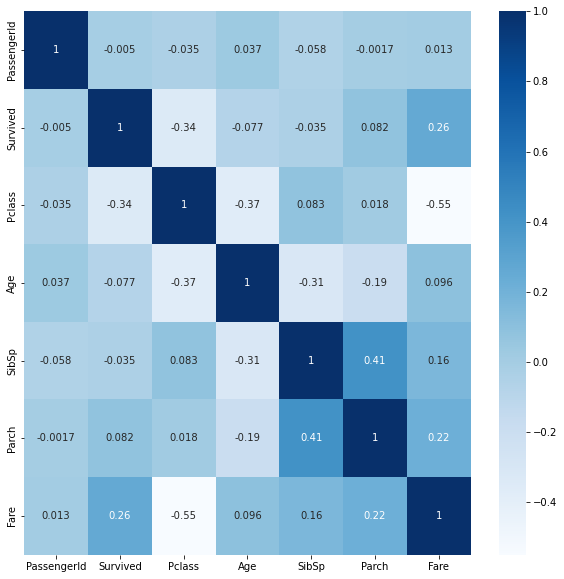

In [60]:
plt.figure(figsize= (10,10))
sns.heatmap(train.corr(),cmap='Blues',annot=True)

As show the graph above:
- The is a strong correlation between Parch and SibSp.To avoid multicolinearty, we should remove one or combine them.
- The is a  correlation among Parch, SibSp,Fare .To avoid multicolinearty, we should tranform them.
- Survived has a good correlation with fare

# 3. Data Wrangling

**Correcting - Droping features**

- Cabine - high number of null values
- Ticket - It seems that it doesn't have correlation with target variable
- PassengerId - It seems that it doesn't have correlation with target variable

In [62]:
train1 = train.drop(['Ticket','Cabin','PassengerId'],axis=1)
test1 = test.drop(['Ticket','Cabin','PassengerId'],axis=1)

**Feature engineering - Name**

In [64]:
train1['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

As show above, each name has a title, which could be linked with the degree of importance.
It will be use regular expressions to extract that. 